In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder

In [2]:
df = pd.read_csv('D:\\ML Folders\\ml_env\\GitHub\\Hero-Product-Recommendation\\Datasets\\rohit_electronics_sales_data.csv')

In [3]:
df.sample(10)

,Transaction ID,Date,Product Category,Subcategory,Product Name,Brand Name,Units Sold,Unit Price,Discount (%),Discounted Price,...,GST_Percentage,GST_Amount,Total_Revenue_Incl_GST,Current Stock,Stock_Status,Rating,Returns,Customer Type,Region,Payment Method
769,TXN100035,2025-02-01,Laptop Accessories,Bags,HP Bags 274,HP,14,32367,5,30748.65,...,18,77486.60,507967.70,22,Low Stock,3.2,0,Returning,Main Market - Rohit Electronics,Cash
258,TXN100013,2025-01-18,Mobile Accessories,Chargers,Realme Chargers 666,Realme,10,17830,10,16047.00,...,18,28884.60,189354.60,36,In Stock,4.4,0,Returning,Main Market - Rohit Electronics,Cash
2695,TXN100036,2025-03-28,Laptops,Business,Lenovo Business 666,Lenovo,3,80549,0,80549.00,...,18,43496.46,285143.46,81,In Stock,4.0,0,Returning,Main Market - Rohit Electronics,Cash
359,TXN100017,2025-01-21,Mobile Accessories,Earphones,Boat Earphones 807,Boat,13,1104,0,1104.00,...,18,2583.36,16935.36,69,In Stock,2.6,0,New,Main Market - Rohit Electronics,Card
3,TXN100003,2025-01-11,Mobiles,Feature Phones,Jio Feature Phones 467,Jio,3,2236,0,2236.00,...,12,804.96,7512.96,5,Low Stock,4.3,0,Returning,Main Market - Rohit Electronics,Cash
561,TXN100022,2025-01-26,Laptop Accessories,Mouse,Logitech Mouse 340,Logitech,12,2521,10,2268.90,...,18,4900.82,32127.62,41,In Stock,3.5,0,Returning,Main Market - Rohit Electronics,Cash
2793,TXN100016,2025-03-31,Mobile Accessories,Cases,Boat Cases 611,Boat,8,1497,10,1347.30,...,18,1940.11,12718.51,77,In Stock,4.5,0,New,Main Market - Rohit Electronics,Cash
1820,TXN100012,2025-03-04,Mobiles,Smartphones,Samsung Smartphones 196,Samsung,2,71256,0,71256.00,...,18,25652.16,168164.16,95,In Stock,3.2,0,New,Main Market - Rohit Electronics,Card
2521,TXN100023,2025-03-23,Mobiles,Feature Phones,Jio Feature Phones 800,Jio,1,2914,5,2768.30,...,12,332.20,3100.50,93,In Stock,4.5,0,New,Main Market - Rohit Electronics,Card
872,TXN100035,2025-02-04,Laptop Accessories,Mouse,Logitech Mouse 946,Logitech,1,879,0,879.00,...,18,158.22,1037.22,98,In Stock,2.7,0,New,Main Market - Rohit Electronics,Cash


In [4]:
df.shape

(3178, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          3178 non-null   object 
 1   Date                    3178 non-null   object 
 2   Product Category        3178 non-null   object 
 3   Subcategory             3178 non-null   object 
 4   Product Name            3178 non-null   object 
 5   Brand Name              3178 non-null   object 
 6   Units Sold              3178 non-null   int64  
 7   Unit Price              3178 non-null   int64  
 8   Discount (%)            3178 non-null   int64  
 9   Discounted Price        3178 non-null   float64
 10  Total Revenue           3178 non-null   float64
 11  GST_Percentage          3178 non-null   int64  
 12  GST_Amount              3178 non-null   float64
 13  Total_Revenue_Incl_GST  3178 non-null   float64
 14  Current Stock           3178 non-null   

In [6]:
df.isna().sum()

Transaction ID            0
Date                      0
Product Category          0
Subcategory               0
Product Name              0
Brand Name                0
Units Sold                0
Unit Price                0
Discount (%)              0
Discounted Price          0
Total Revenue             0
GST_Percentage            0
GST_Amount                0
Total_Revenue_Incl_GST    0
Current Stock             0
Stock_Status              0
Rating                    0
Returns                   0
Customer Type             0
Region                    0
Payment Method            0
dtype: int64

In [7]:
def check_null_unique(df):
    null_data = []
    nunique_vals = 0
    null_per = 0
    unique_vals = []
    for i in df.columns:
        null_val = df[i].isna().sum()
        null_per = (np.round(((null_val)/len(df)),3))*100
        nunique_vals = int(df[i].nunique())
        unique_vals = list(df[i].unique())
        null_data.append([i,null_per,nunique_vals,unique_vals])


    return pd.DataFrame(null_data, columns=['Column', 'Null_Percentage','nunique','unique_vals']) if null_data else pd.DataFrame(columns=['Column', 'Null_Percentage','nunique','unique_vals'])

In [9]:
check_null_unique(df)

,Column,Null_Percentage,nunique,unique_vals
0,Transaction ID,0.0,49,"[TXN100000, TXN100001, TXN100002, TXN100003, T..."
1,Date,0.0,91,"[2025-01-11, 2025-01-12, 2025-01-13, 2025-01-1..."
2,Product Category,0.0,4,"[Mobiles, Laptop Accessories, Mobile Accessori..."
3,Subcategory,0.0,13,"[Smartphones, Mouse, Bags, Feature Phones, Scr..."
4,Product Name,0.0,3016,"[Nothing Smartphones 381, Logitech Mouse 195, ..."
5,Brand Name,0.0,17,"[Nothing, Logitech, Jio, Realme, Zebronics, HP..."
6,Units Sold,0.0,15,"[2, 4, 13, 3, 14, 1, 7, 5, 15, 8, 6, 10, 12, 9..."
7,Unit Price,0.0,2889,"[32314, 1652, 1353, 2236, 8750, 1347, 90589, 8..."
8,Discount (%),0.0,6,"[0, 5, 15, 10, 20, 25]"
9,Discounted Price,0.0,3069,"[32314.0, 1569.4, 1285.35, 2236.0, 8312.5, 134..."


In [10]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
dfs = {}

for i in ['most_frequent', 'mean', 'median', 'constant']:
    imputer1 = SimpleImputer(strategy=i)

    trf = ColumnTransformer([
        ('imputer',imputer1,['Units Sold'])
    ],remainder='passthrough')

    new_x_train = trf.fit_transform(x_train)

    new_column_order = ['Units Sold'] + [col for col in x_train.columns if col != 'Units Sold']
    new_x_train = pd.DataFrame(new_x_train, columns=new_column_order)
    dfs[f"new_x_train_{i}"] = new_x_train

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21228\2236112837.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21228\2236112837.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21228\2236112837.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21228\2236112837.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no a

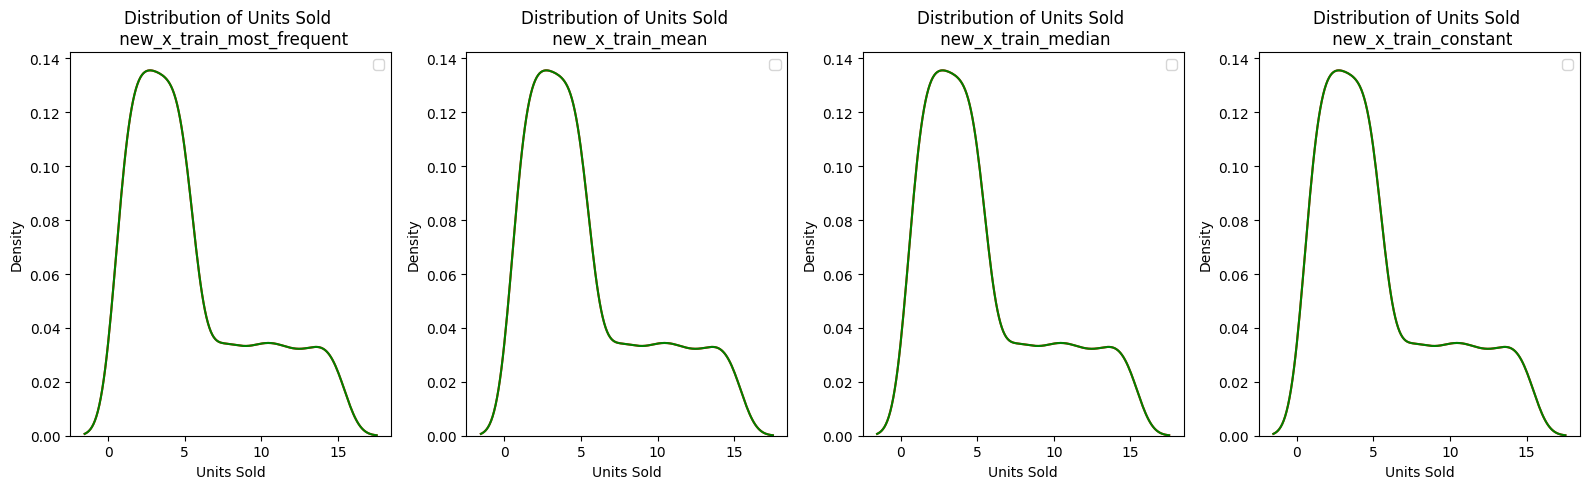

In [12]:
fig,(ax1,ax2,ax3,ax4)  = plt.subplots(ncols=4,figsize=(16,5))
axes = [ax1, ax2, ax3,ax4]
modes = list(dfs.keys())
for i in range(len(dfs)):
    sns.kdeplot(data=x_train, x='Units Sold',color='red',ax=axes[i])
    sns.kdeplot(data=dfs[modes[i]], x='Units Sold',color='green',ax=axes[i])
    axes[i].set_title(f"Distribution of Units Sold \n {modes[i]}")
    axes[i].legend()


plt.tight_layout()
plt.show()

## Sales Trends Over Time

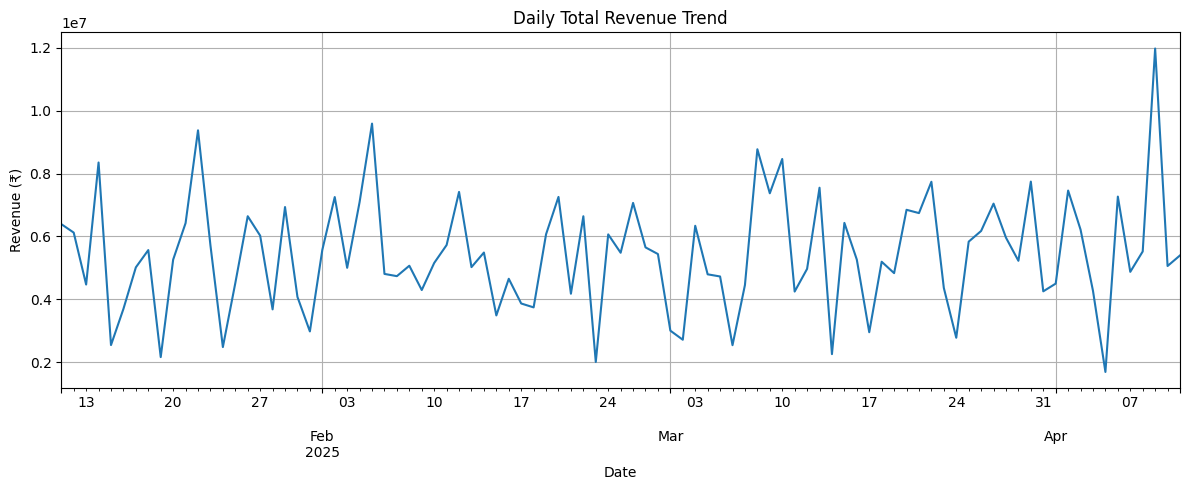

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 5))
df.groupby('Date')['Total Revenue'].sum().plot()
plt.title("Daily Total Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue (₹)")
plt.grid()
plt.tight_layout()
plt.show()


## Top Selling Categories

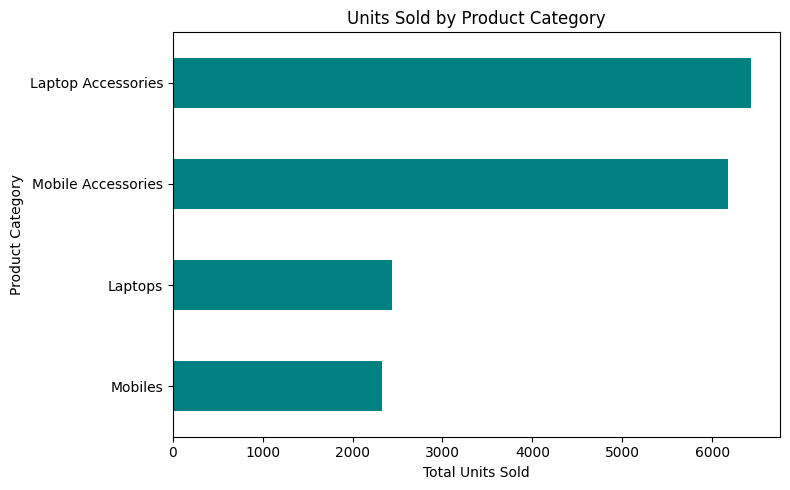

In [14]:
plt.figure(figsize=(8, 5))
df.groupby('Product Category')['Units Sold'].sum().sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title("Units Sold by Product Category")
plt.xlabel("Total Units Sold")
plt.tight_layout()
plt.show()


## Top 10 Selling Products

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21228\656871312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


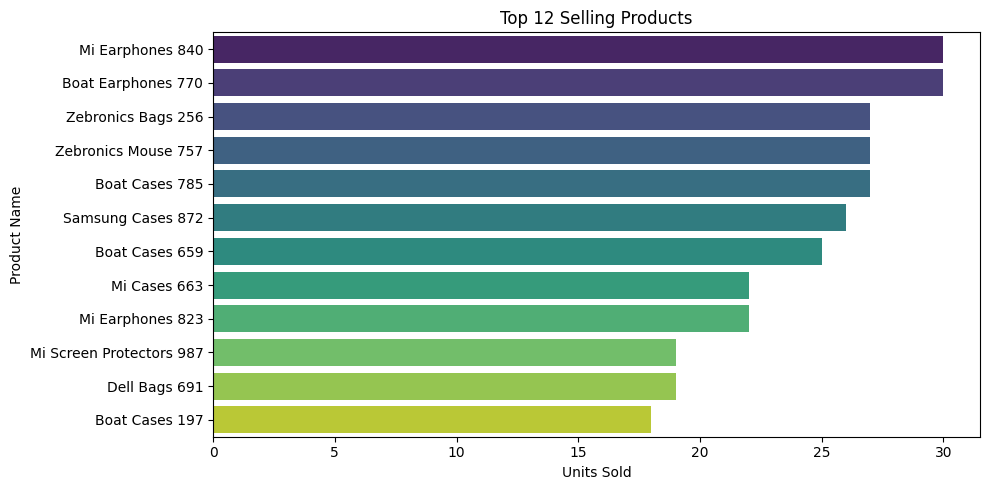

In [15]:
top_products = df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).head(12)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 12 Selling Products")
plt.xlabel("Units Sold")
plt.tight_layout()
plt.show()


## Brand-wise Revenue

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21228\2668697434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_revenue.values, y=brand_revenue.index, palette="magma")


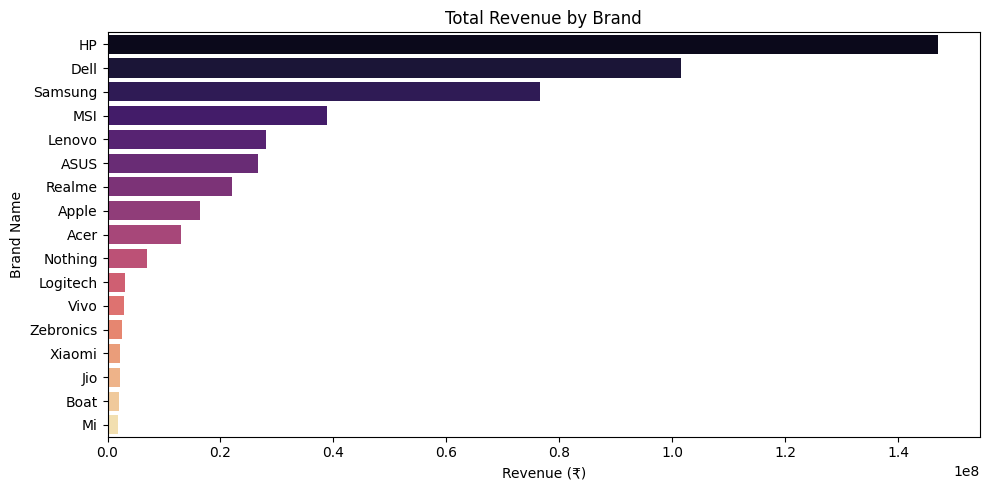

In [16]:
brand_revenue = df.groupby('Brand Name')['Total Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=brand_revenue.values, y=brand_revenue.index, palette="magma")
plt.title("Total Revenue by Brand")
plt.xlabel("Revenue (₹)")
plt.tight_layout()
plt.show()


## Payment Method Distribution

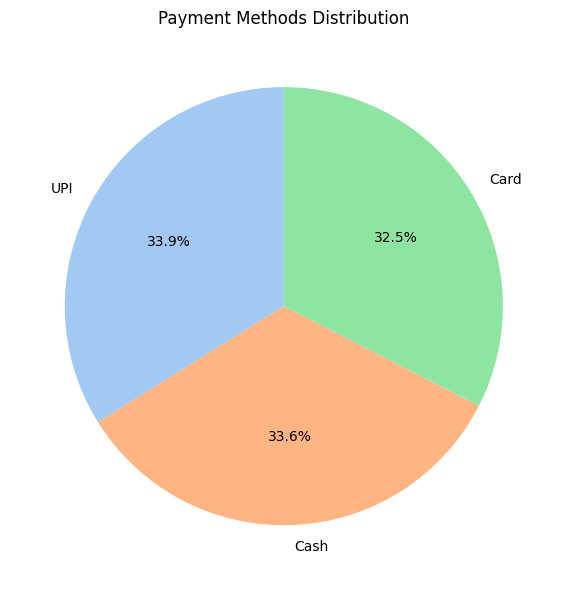

In [17]:
plt.figure(figsize=(6,6))
df['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Payment Methods Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


## Average Rating by Product Category

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21228\3984108240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product Category', y='Rating', palette="Set2")


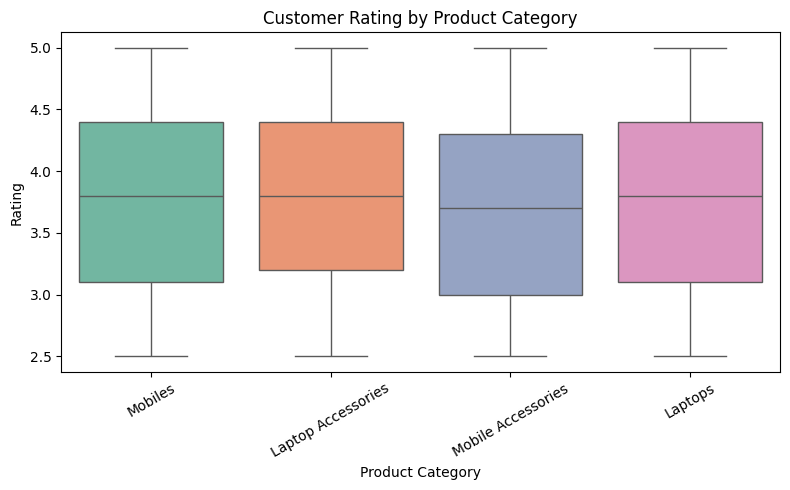

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Product Category', y='Rating', palette="Set2")
plt.title("Customer Rating by Product Category")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## Returns vs Units Sold

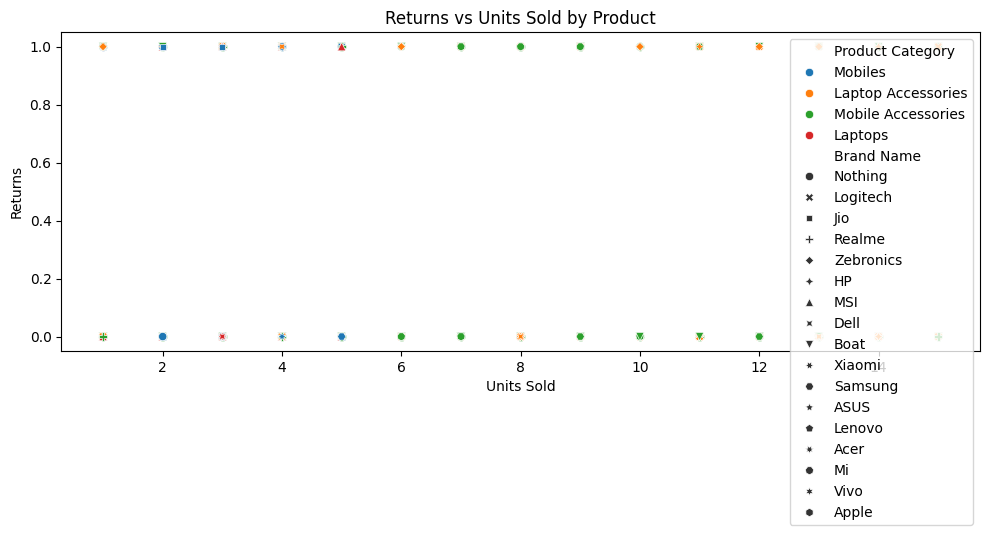

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Units Sold', y='Returns', hue='Product Category', style='Brand Name')
plt.title("Returns vs Units Sold by Product")
plt.tight_layout()
plt.show()


## GST Impact on Final Revenue

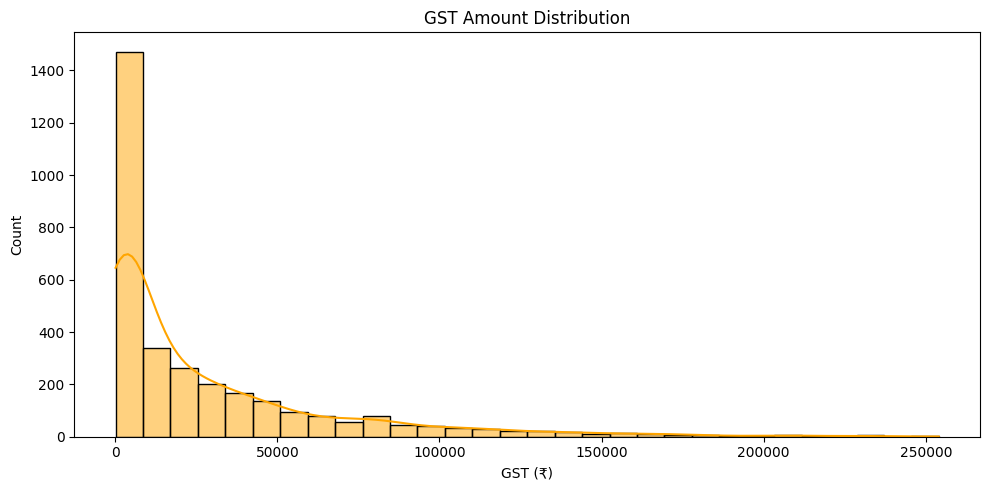

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['GST_Amount'], kde=True, bins=30, color='orange')
plt.title("GST Amount Distribution")
plt.xlabel("GST (₹)")
plt.tight_layout()
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transaction ID          3178 non-null   object        
 1   Date                    3178 non-null   datetime64[ns]
 2   Product Category        3178 non-null   object        
 3   Subcategory             3178 non-null   object        
 4   Product Name            3178 non-null   object        
 5   Brand Name              3178 non-null   object        
 6   Units Sold              3178 non-null   int64         
 7   Unit Price              3178 non-null   int64         
 8   Discount (%)            3178 non-null   int64         
 9   Discounted Price        3178 non-null   float64       
 10  Total Revenue           3178 non-null   float64       
 11  GST_Percentage          3178 non-null   int64         
 12  GST_Amount              3178 non-null   float64 

In [22]:
for i in df.columns:
    print(i," : ",df[i].nunique(),"::",df[i].unique(),"\n\n")

Transaction ID  :  49 :: ['TXN100000' 'TXN100001' 'TXN100002' 'TXN100003' 'TXN100004' 'TXN100005'
 'TXN100006' 'TXN100007' 'TXN100008' 'TXN100009' 'TXN100010' 'TXN100011'
 'TXN100012' 'TXN100013' 'TXN100014' 'TXN100015' 'TXN100016' 'TXN100017'
 'TXN100018' 'TXN100019' 'TXN100020' 'TXN100021' 'TXN100022' 'TXN100023'
 'TXN100024' 'TXN100025' 'TXN100026' 'TXN100027' 'TXN100028' 'TXN100029'
 'TXN100030' 'TXN100031' 'TXN100032' 'TXN100033' 'TXN100034' 'TXN100035'
 'TXN100036' 'TXN100037' 'TXN100038' 'TXN100039' 'TXN100040' 'TXN100041'
 'TXN100042' 'TXN100043' 'TXN100044' 'TXN100045' 'TXN100046' 'TXN100047'
 'TXN100048'] 


Date  :  91 :: <DatetimeArray>
['2025-01-11 00:00:00', '2025-01-12 00:00:00', '2025-01-13 00:00:00',
 '2025-01-14 00:00:00', '2025-01-15 00:00:00', '2025-01-16 00:00:00',
 '2025-01-17 00:00:00', '2025-01-18 00:00:00', '2025-01-19 00:00:00',
 '2025-01-20 00:00:00', '2025-01-21 00:00:00', '2025-01-22 00:00:00',
 '2025-01-23 00:00:00', '2025-01-24 00:00:00', '2025-01-25 00:0

In [ ]:
cols_to_transform = ['Product Category','Subcategory','Product Name','Brand Name','Stock_Status','Customer Type','Payment Method']

In [25]:
dums = pd.get_dummies(df,columns=cols_to_transform,drop_first=True)
dums.sample(10)

,Transaction ID,Date,Units Sold,Unit Price,Discount (%),Discounted Price,Total Revenue,GST_Percentage,GST_Amount,Total_Revenue_Incl_GST,...,Brand Name_Realme,Brand Name_Samsung,Brand Name_Vivo,Brand Name_Xiaomi,Brand Name_Zebronics,Stock_Status_Low Stock,Stock_Status_Out of Stock,Customer Type_Returning,Payment Method_Cash,Payment Method_UPI
2463,TXN100011,2025-03-22,3,13096,10,11786.40,35359.2,18,6364.66,41723.86,...,True,False,False,False,False,True,False,False,False,False
939,TXN100007,2025-02-06,3,2210,0,2210.00,6630.0,12,795.60,7425.60,...,False,False,False,False,False,False,False,False,False,True
1401,TXN100009,2025-02-20,4,1091,0,1091.00,4364.0,12,523.68,4887.68,...,False,False,False,False,False,True,False,False,False,True
2692,TXN100033,2025-03-28,3,1723,0,1723.00,5169.0,18,930.42,6099.42,...,False,False,False,False,False,True,False,True,False,True
982,TXN100025,2025-02-07,5,89910,0,89910.00,449550.0,18,80919.00,530469.00,...,False,False,False,False,False,False,False,True,True,False
2111,TXN100019,2025-03-11,2,1084,20,867.20,1734.4,12,208.13,1942.53,...,False,False,False,False,False,False,False,False,False,False
2972,TXN100023,2025-04-06,10,34523,0,34523.00,345230.0,18,62141.40,407371.40,...,False,True,False,False,False,False,False,True,True,False
1987,TXN100027,2025-03-08,8,62303,0,62303.00,498424.0,18,89716.32,588140.32,...,False,False,False,False,False,True,False,True,False,False
372,TXN100030,2025-01-21,6,634,0,634.00,3804.0,18,684.72,4488.72,...,False,False,False,False,True,True,False,False,False,False
395,TXN100006,2025-01-22,8,859,15,730.15,5841.2,18,1051.42,6892.62,...,False,False,False,False,False,False,False,True,False,False


In [26]:
dums.shape

(3178, 3065)

In [30]:
ct = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False,dtype=np.int32,handle_unknown='ignore',drop='first'),cols_to_transform) # Add handle_unknown='ignore'
],remainder='passthrough')

In [31]:
ct.fit(x_train)

d:\ML Folders\ml_env\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               dtype=<class 'numpy.int32'>,
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Product Category', 'Subcategory',
                                  'Product Name', 'Brand Name', 'Stock_Status',
                                  'Customer Type', 'Payment Method'])])

In [32]:
new_x_train = ct.transform(x_train)
new_x_test = ct.transform(x_test)

d:\ML Folders\ml_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [33]:
new_x_train.shape

(2542, 2477)

In [34]:
new_x_train[1]

array([0, 0, 0, ..., 5.0, 0, 'Main Market - Rohit Electronics'],
      dtype=object)